In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
#imports dataset for cluster characterization
path = os.path.join('cluster_characterization.csv')
df_characterization = pd.read_csv(path)

In [3]:
#imports cluster dataset (w/ outliers integreated and labeled)
df_clustering = pd.read_csv('clustering_output.csv', sep=';')

In [4]:
#puts label columns of clustering in initial dataset based on control code CONTROLN
df_concat = pd.merge(df_characterization, df_clustering[['CONTROLN','labels']], on='CONTROLN', how='right')

In [5]:
label = 'labels' #name cluster column

In [164]:
df_concat.groupby('labels').count()

,CONTROLN,STATE,ZIP,HOMEOWNR,INCOME,GENDER,WEALTH,HIT,MALEMILI,MALEVET,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
labels,,,,,,,,,,,,,,,,,,,,,
0,28554,28554,28554,28554,28554,28554,28554,28554,28554,28554,...,28554,28554,28554,28554,28554,28554,28554,28554,28554,28554
1,28239,28239,28239,28239,28239,28239,28239,28239,28239,28239,...,28239,28239,28239,28239,28239,28239,28239,28239,28239,28239
2,17495,17495,17495,17495,17495,17495,17495,17495,17495,17495,...,17495,17495,17495,17495,17495,17495,17495,17495,17495,17495


# CLUSTERING VARIABLES

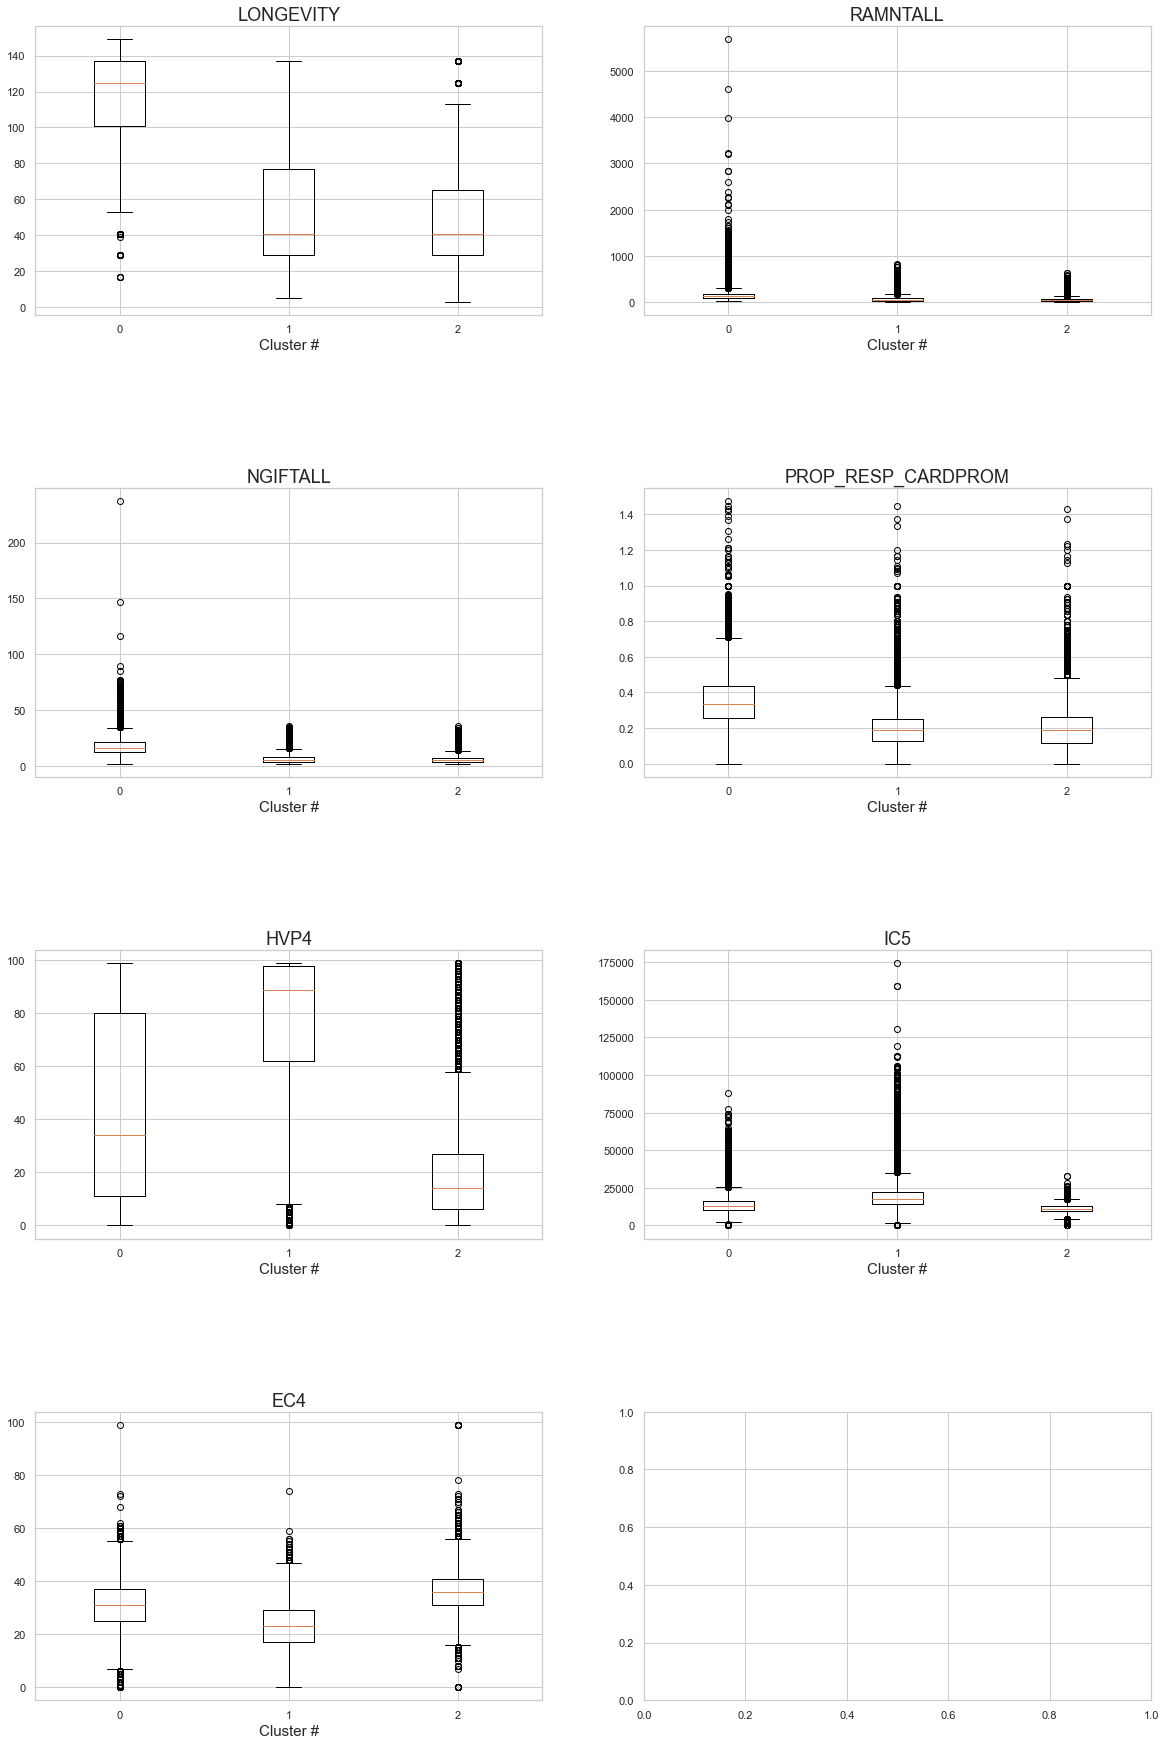

In [6]:
df_plots = df_clustering.iloc[:,1:-1]

sns.set()
sns.set_style(style="whitegrid")
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

for ax, variable in zip(axes.flatten(), df_plots.columns):
    my_dict = {'0': df_concat[df_concat[label]==0][variable].values, '1': df_concat[df_concat[label]==1][variable].values, '2': df_concat[df_concat[label]==2][variable].values}
    ax.boxplot(my_dict.values())
    ax.set_title(variable, fontsize = 18)
    ax.set_xlabel('Cluster #', fontsize = 15)
    ax.set_xticklabels(['0','1','2'])
    
plt.subplots_adjust(hspace=0.6, top=0.90)
    
plt.show()


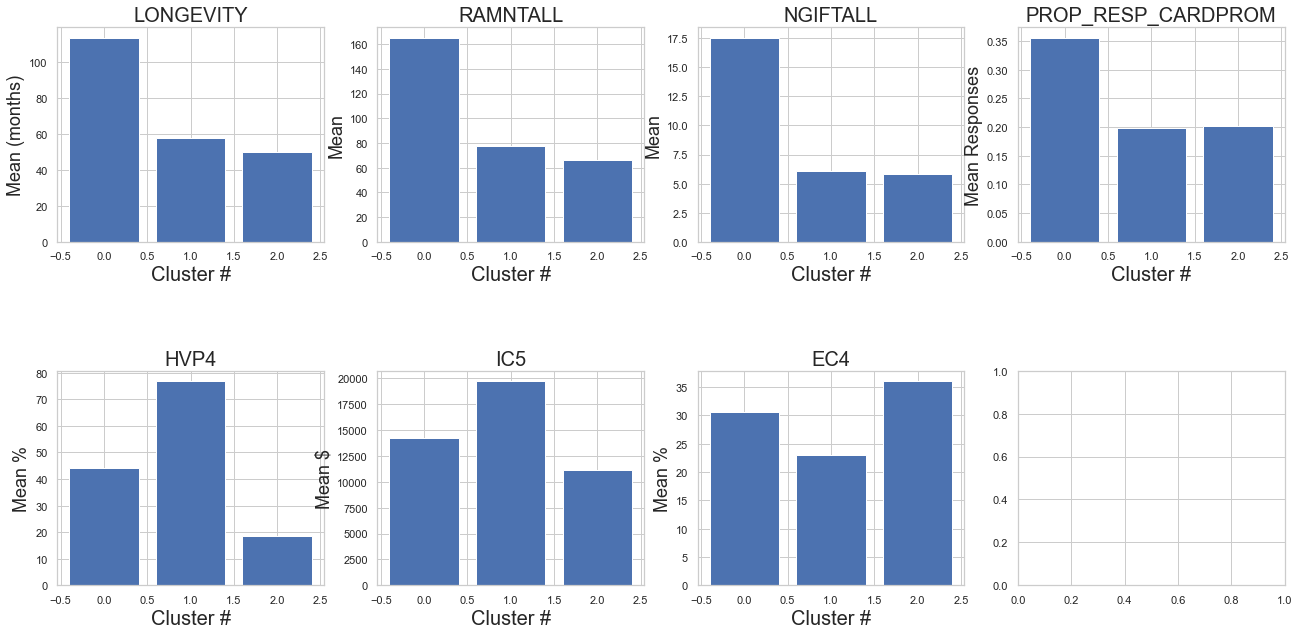

In [154]:
df_plots = df_clustering.iloc[:,1:-1]

sns.set()
sns.set_style(style="whitegrid")
fig, axes = plt.subplots(2, 4, figsize=(22, 10))
plt.rcParams.update({'font.size': 18})

for ax, variable in zip(axes.flatten(), df_plots.columns):
    my_dict = {'0': np.mean(df_concat[df_concat[label]==0][variable].values), '1': np.mean(df_concat[df_concat[label]==1][variable].values), '2': np.mean(df_concat[df_concat[label]==2][variable].values)}
    ax.bar([0,1,2], my_dict.values())
    ax.set_title(variable, fontsize = 20)
    ax.set_xlabel('Cluster #', fontsize = 20)
    #set_xticklabels(['0','1','2'])
    if variable == 'LONGEVITY':
        ax.set_ylabel('Mean (months)', fontsize = 18)
    if variable == 'RAMNTALL':
        ax.set_ylabel('Mean', fontsize = 18)
    if variable == 'NGIFTALL':
        ax.set_ylabel('Mean', fontsize = 18)
    if variable == 'PROP_RESP_CARDPROM':
        ax.set_ylabel('Mean Responses', fontsize = 18)
    if variable == 'HVP4' or variable == 'EC4':
        ax.set_ylabel('Mean %', fontsize = 18)
    if variable == 'IC5':
        ax.set_ylabel('Mean $', fontsize = 18)
    
plt.subplots_adjust(hspace=0.6, top=0.90)
    
plt.show()

# PREFERENCES/INTERESTS

Percent people of each group that has X interest (no data donors removed)

In [8]:
select_relevant_interests = df_concat.loc[:,'COLLECT1':'PLATES'].join(df_concat[label])
select_relevant_interests = select_relevant_interests[~select_relevant_interests.loc[:,'COLLECT1':'PLATES'].eq(0).all(1)] #gets donors that have ANY interest recorded; assumes ones that don't have didn't had data on this, since this was filled with 0 initially

In [9]:
frq_binary_interests = (select_relevant_interests.groupby(label).agg('sum') / select_relevant_interests.groupby(label).count())*100

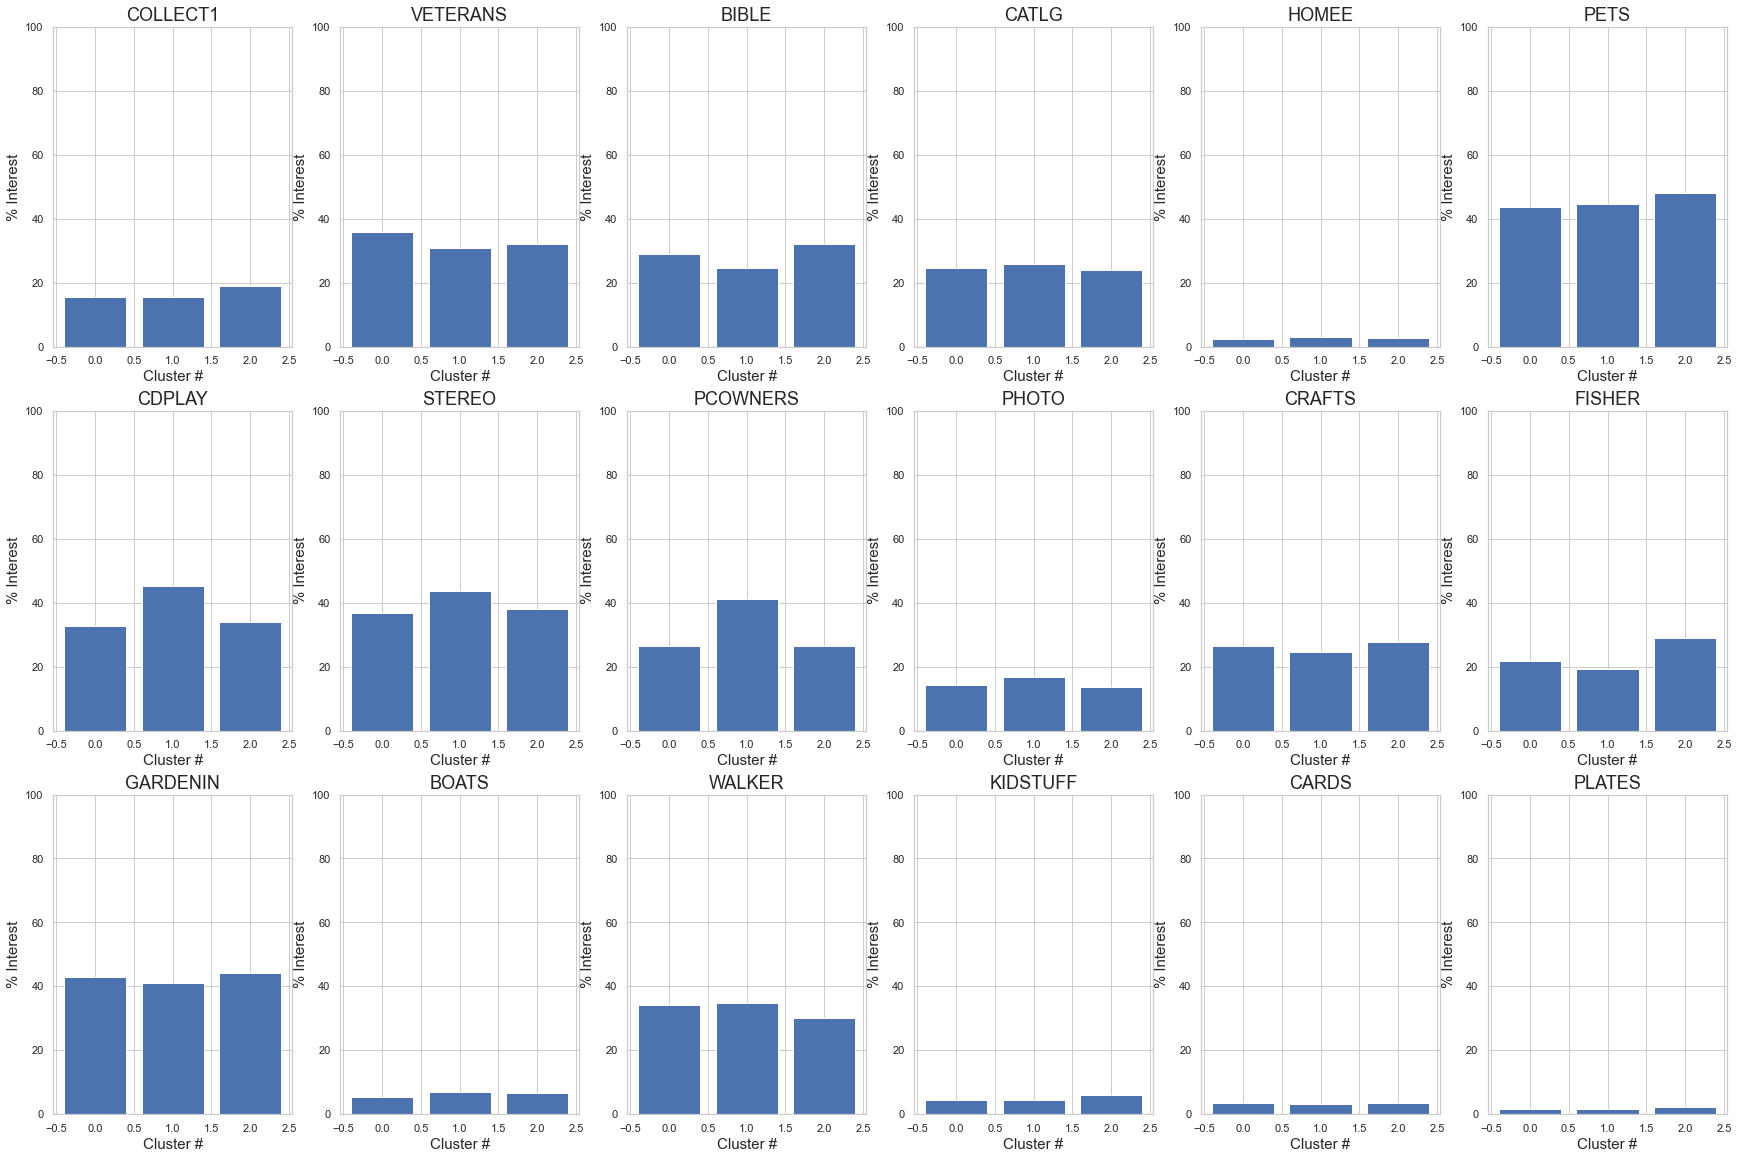

In [10]:
#Percent donors with said interest (from donor who showed ANY interest data only!!!)

fig, axes = plt.subplots(3, ceil(frq_binary_interests.shape[1] / 3), figsize=(30, 20))

for ax, interest in zip(axes.flatten(), frq_binary_interests):
    ax.bar(frq_binary_interests.index, frq_binary_interests[interest])
    ax.set_title(interest, fontsize = 18)
    ax.set_xlabel('Cluster #', fontsize = 15)
    ax.set_ylabel('% Interest', fontsize = 15)
    ax.set_ylim(0,100)
    
plt.show()

Nr times has responded to said type of email offer (no data donors removed)

In [11]:
select_relevant_clicks = df_concat.loc[:,'MBCRAFT':'PUBOPP'].join(df_concat[label])
select_relevant_clicks = select_relevant_clicks[~select_relevant_clicks.loc[:,'MBCRAFT':'PUBOPP'].eq(0).all(1)] #gets donors that have ANY clicks recorded; assumes ones that don't have didn't had data on this, since this was filled with 0 initially

In [12]:
mean_clicks = select_relevant_clicks.groupby(label).agg('mean')

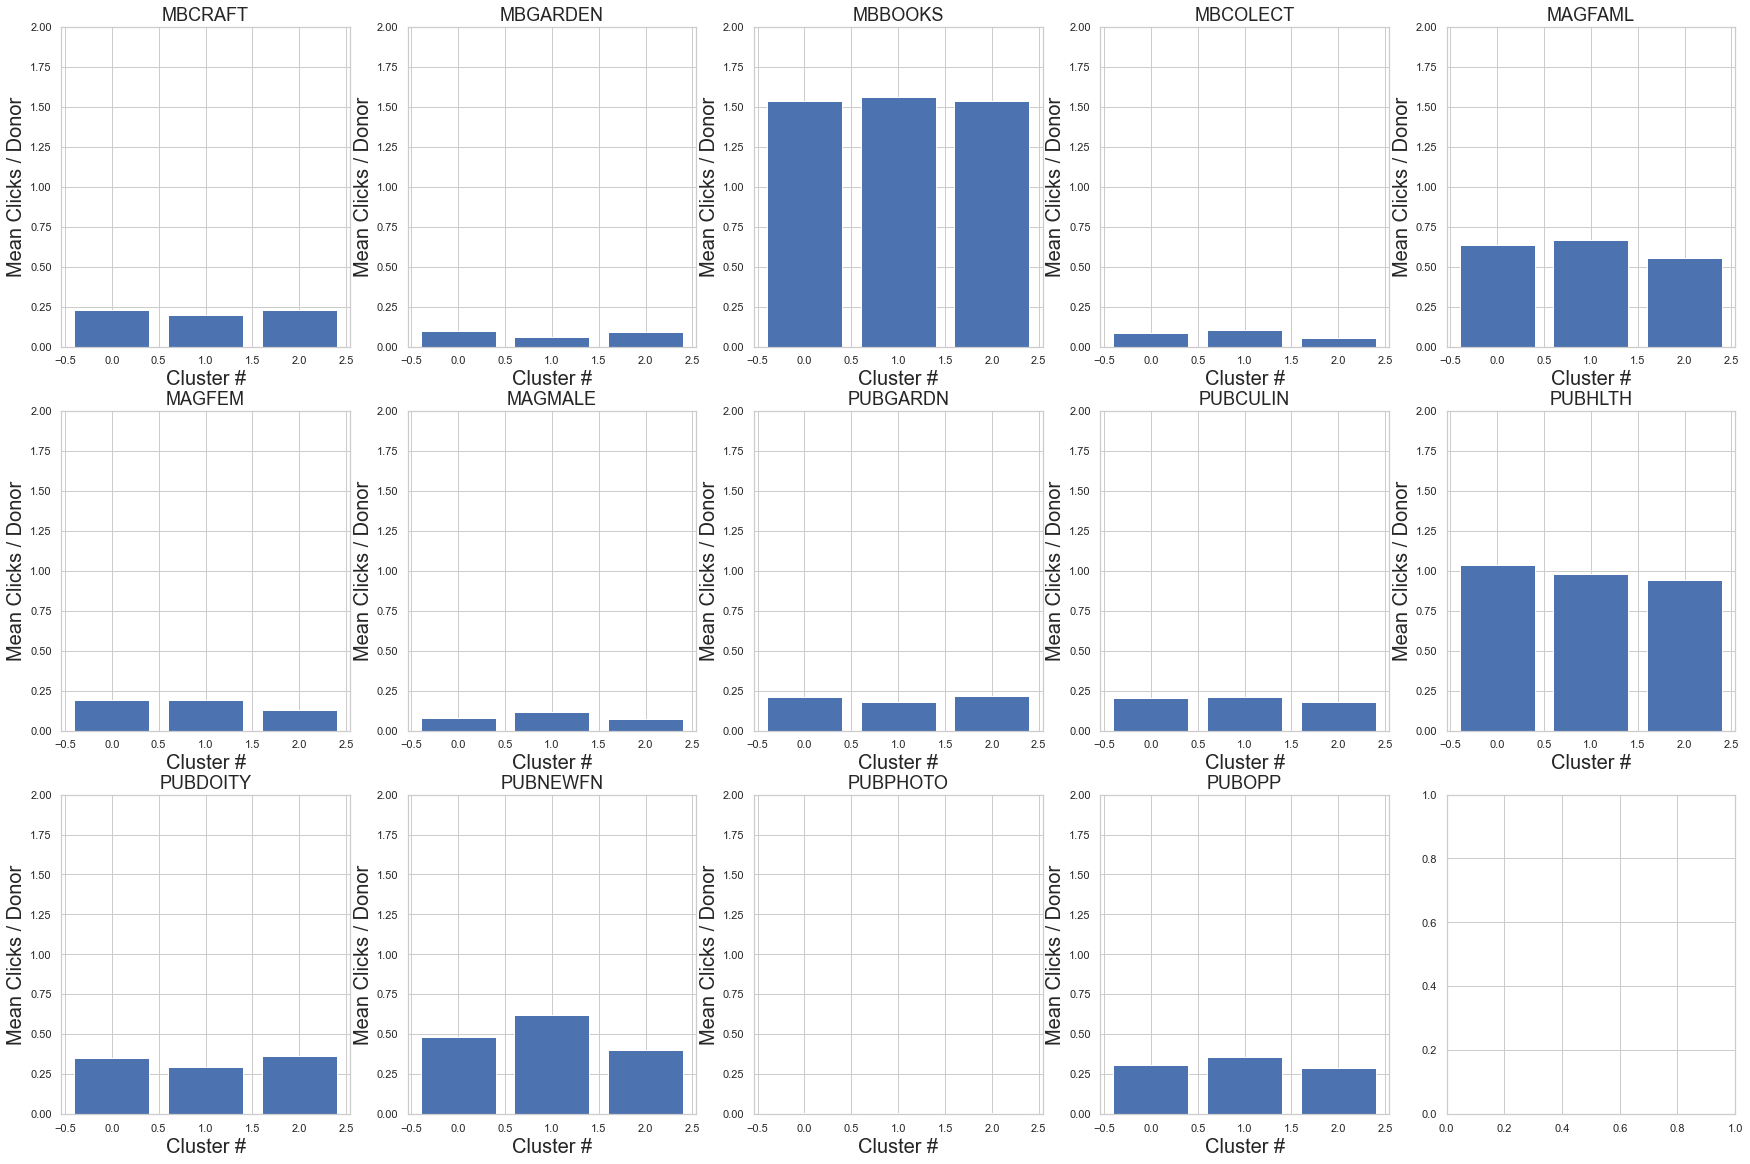

In [139]:
#Percent donors with said interest (from donor who showed ANY interest data only!!!)

fig, axes = plt.subplots(3, ceil(mean_clicks.shape[1] / 3), figsize=(30, 20))

for ax, interest in zip(axes.flatten(), mean_clicks):
    ax.bar(mean_clicks.index, mean_clicks[interest])
    ax.set_title(interest, fontsize = 18)
    ax.set_xlabel('Cluster #', fontsize = 20)
    ax.set_ylabel('Mean Clicks / Donor', fontsize = 20)
    ax.set_ylim(0,2)

plt.show()

# LOCATION, GENDER & WEALTH from DEMOGRAPHICS

In [14]:
###MDMAUD - tens de ir ao dataset de cleaning e fazer replace por binário: worth the trouble??

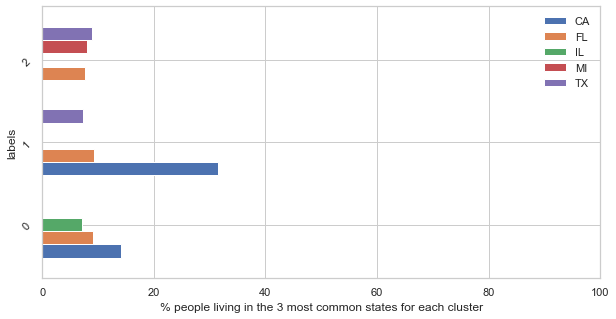

In [155]:
#plots % of people living in the 3 most common states for each cluster
select_relevant_state = df_concat[['STATE']].join(df_concat[label])
select_relevant_state = pd.DataFrame(select_relevant_state.groupby([label]).STATE.apply(lambda x: (x.value_counts()/len(x)) *100))
select_relevant_state = select_relevant_state.unstack(1)
select_relevant_state = select_relevant_state.fillna(0)#[('STATE', 'CA')]
select_relevant_state = select_relevant_state.apply(lambda x: pd.Series(x.nlargest(3)), axis=1)

sns.set(rc={'figure.figsize':(10,5)})
plt.rcParams.update({'font.size': 18})
sns.set_style(style = 'whitegrid')
select_relevant_state.plot(kind='barh', rot=45, width=0.8)
plt.xlabel('% people living in the 3 most common states for each cluster')
plt.legend(["CA", "FL", "IL", "MI", "TX"], loc=0, frameon=False, fontsize = 11)
plt.xlim(0,100)
plt.show()

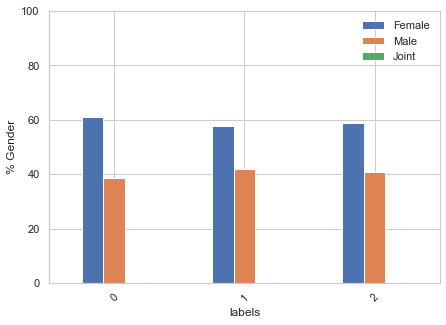

In [161]:
#plots % people by gender within each cluster
select_relevant_gender = df_concat[['GENDER']].join(df_concat[label])
select_relevant_gender = pd.DataFrame(select_relevant_gender.groupby([label]).GENDER.apply(lambda x: (x.value_counts()/len(x)) *100))
select_relevant_gender = select_relevant_gender.unstack(1)
select_relevant_gender.plot(kind='bar', rot=45)
sns.set(rc={'figure.figsize':(7,5)})
plt.rcParams.update({'font.size': 24})
sns.set_style(style = 'whitegrid')
plt.ylabel('% Gender')
plt.legend(["Female", "Male", "Joint"], loc=0, frameon=False, fontsize = 11)
plt.ylim(0,100)
plt.show()

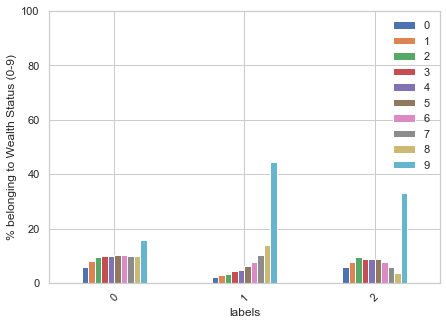

In [160]:
#plots % people by wealth status (1-9) within each cluster
select_relevant_wealth = df_concat[['WEALTH']].join(df_concat[label])
select_relevant_wealth = pd.DataFrame(select_relevant_wealth.groupby([label]).WEALTH.apply(lambda x: (x.value_counts()/len(x)) *100))
select_relevant_wealth = select_relevant_wealth.unstack(1)
sns.set(rc={'figure.figsize':(7,5)})
plt.rcParams.update({'font.size': 24})
sns.set_style(style = 'whitegrid')
select_relevant_wealth.plot(kind='bar', rot=45)
plt.ylabel('% belonging to Wealth Status (0-9)')
plt.legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], loc=0, frameon=False, fontsize = 11)
plt.ylim(0,100)
plt.show()

# CENSUS VARIABLES

In [79]:
select_relevant_census = df_concat.loc[:,'POP901' : 'AC2'].join(df_concat[label])
#select_relevant_census = select_relevant_census[~select_relevant_census.loc[:,'POP901' : 'AC2'].eq(0).all(1)]
df_plots = select_relevant_census.iloc[:,:-1]

DISCLAIMER: We suspect that these data's 0's represent missing data, as a lot of these features are percentages and don't make sense existing so many 0's. Thus, results and comparisons should have that into consideration: probably differences between clusters are not so exarcebatted in the boxplots below because of this fact, especially because boxplots give us the median of the values. Although we think this is the case, we did not clean these data, as we only used it for confirmation purposes of previous conclusions.

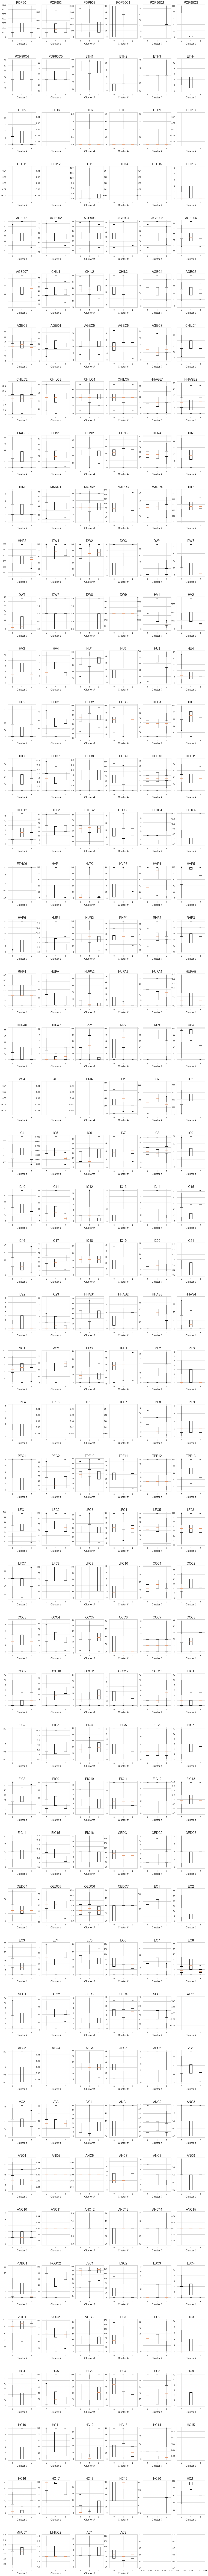

In [42]:
sns.set()
sns.set_style(style="whitegrid")
fig, axes = plt.subplots(48, 6, figsize=(20, 260))

for ax, variable in zip(axes.flatten(), df_plots.columns):
    my_dict = {'0': select_relevant_census[select_relevant_census[label]==0][variable].values, '1': select_relevant_census[select_relevant_census[label]==1][variable].values, '2': select_relevant_census[select_relevant_census[label]==2][variable].values}
    ax.boxplot(my_dict.values(), showfliers=False)
    ax.set_title(variable, fontsize = 18)
    ax.set_xlabel('Cluster #', fontsize = 15)
    ax.set_xticklabels(['0','1','2'])
    
plt.subplots_adjust(hspace=0.6, top=0.90)
    
plt.show()
